In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.tree import plot_tree

In [109]:
# Load the dataset
data = pd.read_csv(r'C:\Users\yekta\Desktop\cancer patient data sets.csv')
data = data.sample(frac=1).reset_index(drop=True)  # Shuffle data

In [110]:
# Select columns
selected_columns = ["Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy",
                    "OccuPational Hazards", "Genetic Risk", "chronic Lung Disease",
                    "Balanced Diet", "Obesity", "Smoking", "Passive Smoker",
                    "Chest Pain", "Coughing of Blood", "Fatigue", "Weight Loss",
                    "Shortness of Breath", "Wheezing", "Swallowing Difficulty",
                    "Clubbing of Finger Nails", "Frequent Cold", "Dry Cough",
                    "Snoring", "Level"]
# Update the DataFrame with selected columns
data = data[selected_columns]
# Map 'Level' column to numerical values
data['Level'].value_counts()
data = data.replace({'Level': {'Low': 1, 'Medium': 2, 'High': 3}})

In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1000 non-null   int64
 1   Gender                    1000 non-null   int64
 2   Air Pollution             1000 non-null   int64
 3   Alcohol use               1000 non-null   int64
 4   Dust Allergy              1000 non-null   int64
 5   OccuPational Hazards      1000 non-null   int64
 6   Genetic Risk              1000 non-null   int64
 7   chronic Lung Disease      1000 non-null   int64
 8   Balanced Diet             1000 non-null   int64
 9   Obesity                   1000 non-null   int64
 10  Smoking                   1000 non-null   int64
 11  Passive Smoker            1000 non-null   int64
 12  Chest Pain                1000 non-null   int64
 13  Coughing of Blood         1000 non-null   int64
 14  Fatigue                   1000 non-null  

In [112]:
data.describe()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
count,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000,5.165000,4.840000,4.580000,4.380000,4.491000,4.465000,...,3.856000,3.855000,4.240000,3.777000,3.746000,3.923000,3.536000,3.853000,2.926000,2.062000
std,12.005493,0.490547,2.0304,2.620477,1.980833,2.107805,2.126999,1.848518,2.135528,2.124921,...,2.244616,2.206546,2.285087,2.041921,2.270383,2.388048,1.832502,2.039007,1.474686,0.815365
min,14.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,27.750000,1.000000,2.0000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,3.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
50%,36.000000,1.000000,3.0000,5.000000,6.000000,5.000000,5.000000,4.000000,4.000000,4.000000,...,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,2.000000
75%,45.000000,2.000000,6.0000,7.000000,7.000000,7.000000,7.000000,6.000000,7.000000,7.000000,...,5.000000,6.000000,6.000000,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,3.000000
max,73.000000,2.000000,8.0000,8.000000,8.000000,8.000000,7.000000,7.000000,7.000000,7.000000,...,9.000000,8.000000,9.000000,8.000000,8.000000,9.000000,7.000000,7.000000,7.000000,3.000000


In [113]:
# Check for missing values in the dataset
data.isnull().sum()

Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64

In [114]:
# Count the occurrences of each value in the 'Level' column
data['Level'].value_counts()

3    365
2    332
1    303
Name: Level, dtype: int64

In [115]:
data.head()

,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,Obesity,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,46,2,1,6,7,5,3,2,6,2,...,3,3,7,7,4,8,7,7,5,2
1,32,2,1,6,7,8,7,6,7,7,...,3,2,6,4,2,3,1,2,1,2
2,52,1,6,8,7,7,7,6,2,4,...,2,7,6,5,1,9,3,4,2,2
3,26,2,7,7,7,7,7,6,7,7,...,2,7,6,7,6,7,2,3,1,3
4,32,1,2,3,6,7,7,7,7,2,...,2,1,3,2,2,1,2,5,1,1


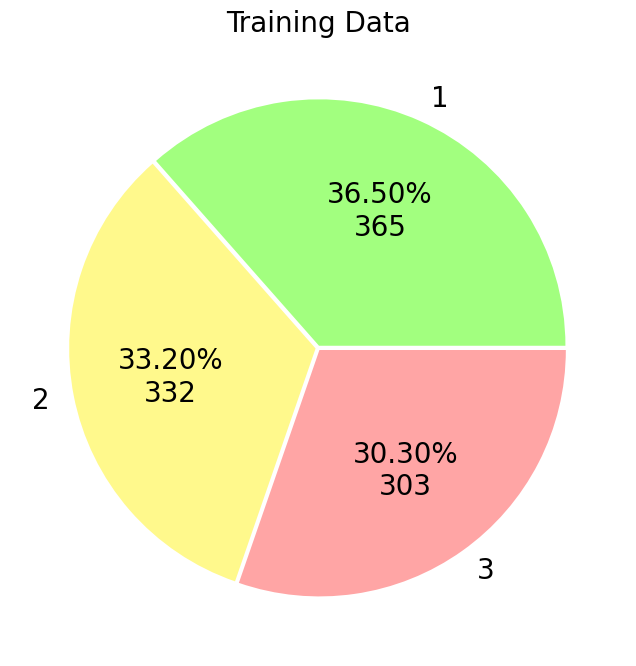

In [116]:
# Define the mapping for visualization
mapping = {1: 'Low', 2: 'Medium', 3: 'High'}

# Pie chart for the 'Level' distribution
plt.figure(figsize=(10, 8))
plt.title('Training Data', fontsize=20)
plt.pie(data['Level'].value_counts(),
    labels=mapping.keys(),
    colors=['#A2FF7F', '#FFF98C', '#FFA5A5'], 
    autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(data['Level'].value_counts()) / 100),
    explode=tuple(0.01 for i in range(3)),
    textprops={'fontsize': 20}
)
plt.show()

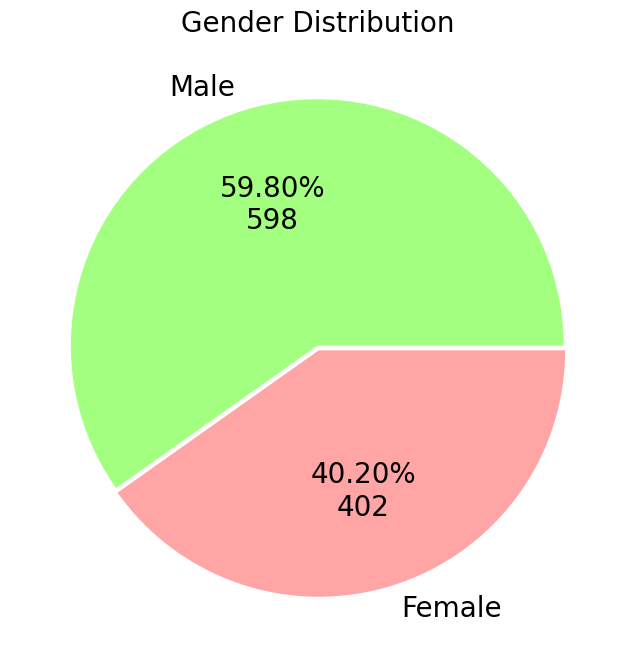

In [117]:
# Define the gender mapping for visualization
gender_mapping = {1: 'Male', 2: 'Female'}

# Pie chart for the gender distribution
plt.figure(figsize=(10, 8))
plt.title('Gender Distribution', fontsize=20)
plt.pie(data['Gender'].value_counts(),
        labels=gender_mapping.values(),
        colors=['#A2FF7F', '#FFA5A5'],  # Light Green for Male, Light Red for Female
        autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(data['Gender'].value_counts()) / 100),
        explode=(0.01, 0.01),
        textprops={'fontsize': 20}
)
plt.show()


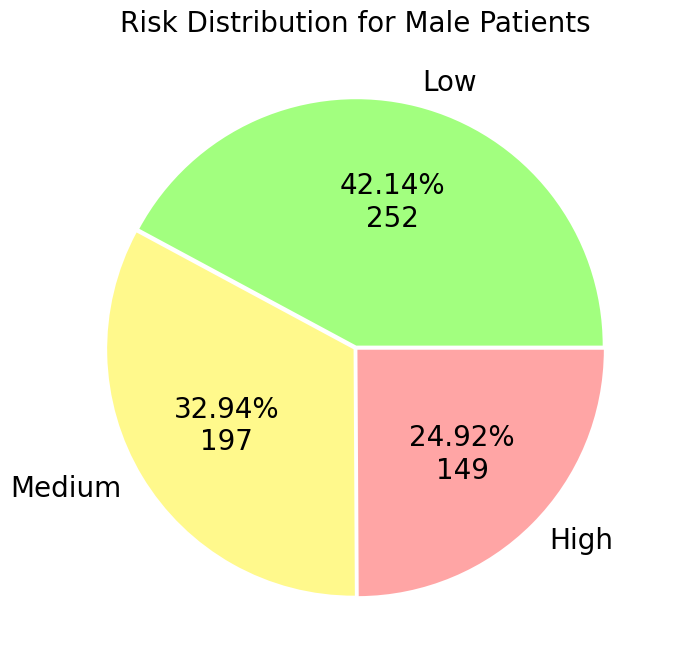

In [118]:
# Selecting only male patients
male_data = data[data['Gender'] == 1]  

level_mapping = {1: 'Low', 2: 'Medium', 3: 'High'}

plt.figure(figsize=(10, 8))
plt.title('Risk Distribution for Male Patients', fontsize=20)
plt.pie(male_data['Level'].value_counts(),
        labels=level_mapping.values(),
        colors=['#A2FF7F', '#FFF98C', '#FFA5A5'],  # Light Green, Light Yellow, Light Red
        autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(male_data['Level'].value_counts()) / 100),
        explode=tuple(0.01 for i in range(3)),
        textprops={'fontsize': 20}
)
plt.show()


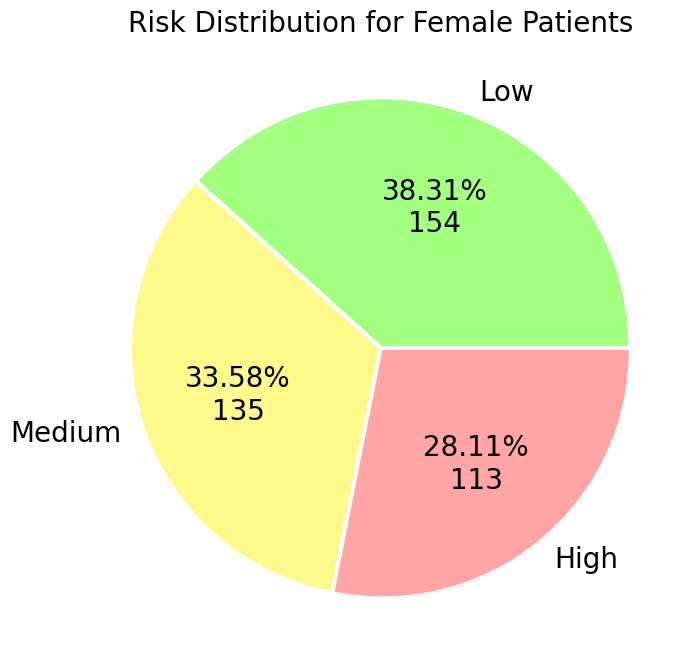

In [119]:
# Selecting only female patients
female_data = data[data['Gender'] == 2]  

level_mapping = {1: 'Low', 2: 'Medium', 3: 'High'}

plt.figure(figsize=(10, 8))
plt.title('Risk Distribution for Female Patients', fontsize=20)
plt.pie(female_data['Level'].value_counts(),
        labels=level_mapping.values(),
        colors=['#A2FF7F', '#FFF98C', '#FFA5A5'],  # Light Green, Light Yellow, Light Red
        autopct=lambda p: '{:.2f}%\n{:,.0f}'.format(p, p * sum(female_data['Level'].value_counts()) / 100),
        explode=tuple(0.01 for i in range(3)),
        textprops={'fontsize': 20}
)
plt.show()


In [120]:
# Filter data for male patients
male_data = data[data['Gender'] == 1]

In [121]:
# Filter data for female patients
female_data = data[data['Gender'] == 2]

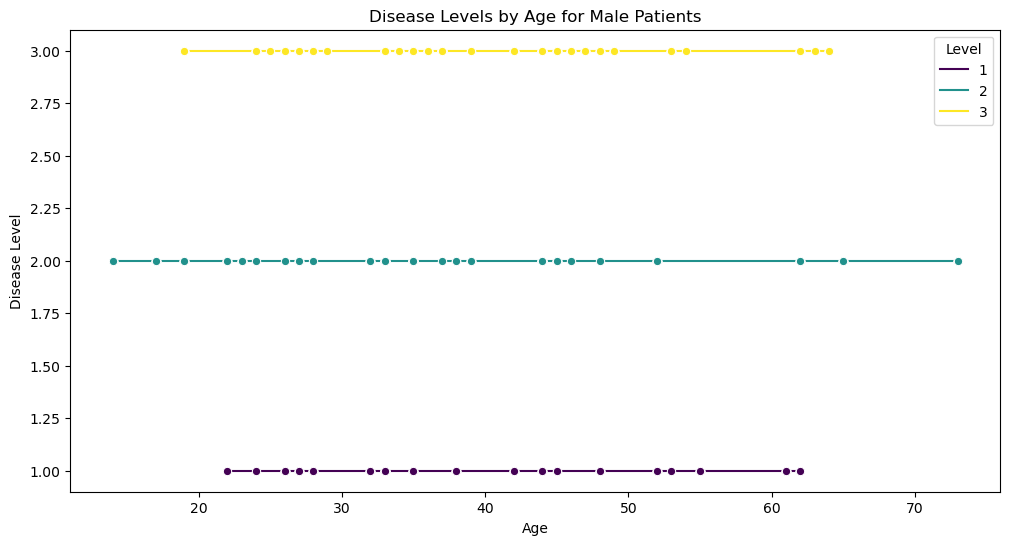

In [122]:
# Line plot
plt.figure(figsize=(12, 6))
sns.lineplot(data=male_data, x="Age", y="Level", estimator=None, marker='o', hue="Level", palette="viridis")
plt.title("Disease Levels by Age for Male Patients")
plt.xlabel("Age")
plt.ylabel("Disease Level")
plt.show()

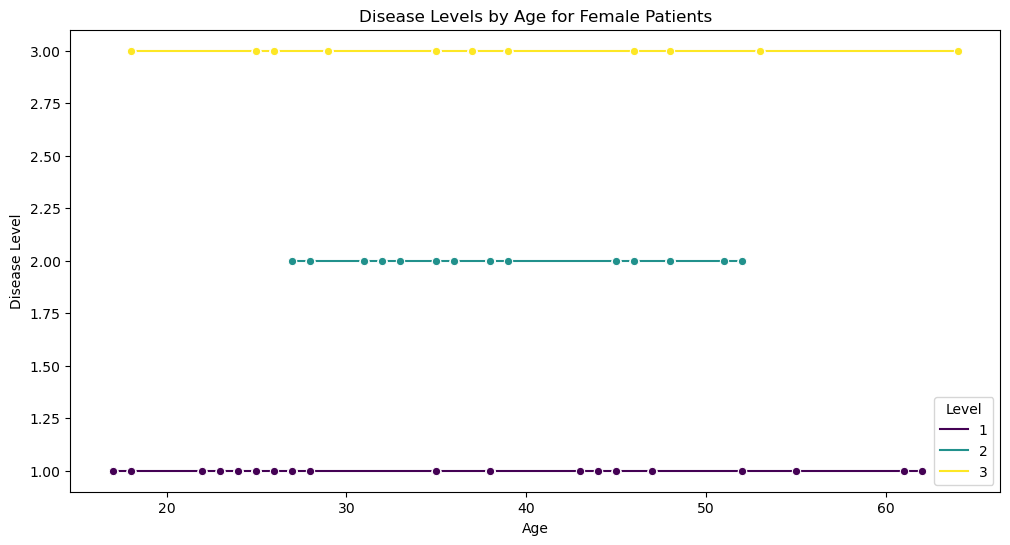

In [123]:
# Line plot for female patients
plt.figure(figsize=(12, 6))
sns.lineplot(data=female_data, x="Age", y="Level", estimator=None, marker='o', hue="Level", palette="viridis")
plt.title("Disease Levels by Age for Female Patients")
plt.xlabel("Age")
plt.ylabel("Disease Level")
plt.show()

C:\Users\yekta\AppData\Local\Temp\ipykernel_5652\41735836.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.Age, shade = True, color = "r")


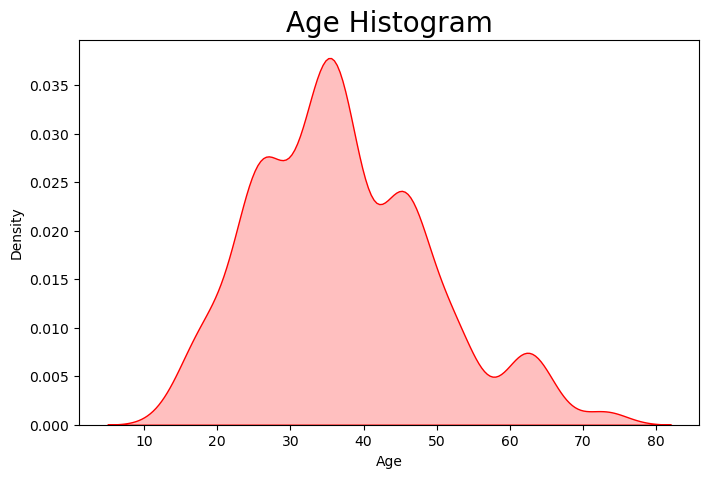

Histogram's skewness is 0.5510959291276972 and kurtosis is 0.059540224308944456


In [124]:
plt.figure(figsize = (8,5))
sns.kdeplot(data.Age, shade = True, color = "r")
plt.title("Age Histogram", fontsize = 20)
plt.show()
print("Histogram's skewness is {} and kurtosis is {}".format(data.Age.skew(), data.Age.kurtosis()))

In [125]:
# Prepare data before training the model
X = data.drop('Level', axis=1)
y = data['Level']

In [126]:
# Label Encoding
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [127]:
# Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [128]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.30, random_state=1)

In [129]:
# Logistic Regression modeli
lr_classifier = LogisticRegression(solver='liblinear')
lr_classifier.fit(X_train, y_train)
y_test_hat_lr = lr_classifier.predict(X_test)

In [130]:
# Cross-validation - Logistic Regression
cv_scores_lr = cross_val_score(lr_classifier, X_scaled, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("\nCross-Validation Scores - Logistic Regression:", cv_scores_lr)



Cross-Validation Scores - Logistic Regression: [0.955 0.965 0.985 0.96  0.955]


In [131]:
# Confusion Matrix and other metrics
cm_lr = confusion_matrix(y_test, y_test_hat_lr)
print("Confusion Matrix - Logistic Regression:\n", cm_lr)

Confusion Matrix - Logistic Regression:
 [[105   0   0]
 [  1  79   4]
 [  0   0 111]]


In [132]:
# Accuracy
accuracy_lr = accuracy_score(y_test, y_test_hat_lr)
print("Accuracy - Logistic Regression:", accuracy_lr)

Accuracy - Logistic Regression: 0.9833333333333333


In [133]:
# Precision, Recall, F1 Score
print("\nClassification Report - Logistic Regression:\n", classification_report(y_test, y_test_hat_lr))


Classification Report - Logistic Regression:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       1.00      0.94      0.97        84
           2       0.97      1.00      0.98       111

    accuracy                           0.98       300
   macro avg       0.99      0.98      0.98       300
weighted avg       0.98      0.98      0.98       300



In [134]:
# ROC AUC Score
y_prob_lr = lr_classifier.predict_proba(X_test)
roc_auc_lr = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')
print("ROC AUC Score - Logistic Regression:", roc_auc_lr)

ROC AUC Score - Logistic Regression: 0.9935198094920317


In [135]:
# Random Forest model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train)
y_test_hat_rf = rf_classifier.predict(X_test)

In [136]:
# Cross-validation - Random Forest
cv_scores_rf = cross_val_score(rf_classifier, X_scaled, y, cv=StratifiedKFold(n_splits=5), scoring='accuracy')
print("\nCross-Validation Scores - Random Forest:", cv_scores_rf)



Cross-Validation Scores - Random Forest: [1. 1. 1. 1. 1.]


In [137]:
# Confusion Matrix and other metrics for Random Forest
cm_rf = confusion_matrix(y_test, y_test_hat_rf)
print("\nConfusion Matrix - Random Forest:\n", cm_rf)


Confusion Matrix - Random Forest:
 [[105   0   0]
 [  0  84   0]
 [  0   0 111]]


In [138]:
# Accuracy
accuracy_rf = accuracy_score(y_test, y_test_hat_rf)
print("Accuracy - Random Forest:", accuracy_rf)

Accuracy - Random Forest: 1.0


In [139]:
# Precision, Recall, F1 Score
print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_test_hat_rf))


Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       111

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [140]:
# ROC AUC Score
y_prob_rf = rf_classifier.predict_proba(X_test)
roc_auc_rf = roc_auc_score(y_test, y_prob_rf, multi_class='ovr')
print("ROC AUC Score - Random Forest:", roc_auc_rf)

ROC AUC Score - Random Forest: 1.0


In [141]:
# Neural Network (ANN) model
model_ann = Sequential()
model_ann.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model_ann.add(Dense(64, activation='relu'))
model_ann.add(Dense(3, activation='softmax'))


In [142]:
model_ann.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
22/22 [==============================] - 2s 16ms/step - loss: 0.9204 - accuracy: 0.4871 - val_loss: 0.7566 - val_accuracy: 0.7400
Epoch 2/50
22/22 [==============================] - 0s 6ms/step - loss: 0.6333 - accuracy: 0.8114 - val_loss: 0.5049 - val_accuracy: 0.8867
Epoch 3/50
22/22 [==============================] - 0s 6ms/step - loss: 0.4320 - accuracy: 0.8757 - val_loss: 0.3477 - val_accuracy: 0.9167
Epoch 4/50
22/22 [==============================] - 0s 5ms/step - loss: 0.3057 - accuracy: 0.9086 - val_loss: 0.2480 - val_accuracy: 0.9500
Epoch 5/50
22/22 [==============================] - 0s 4ms/step - loss: 0.2280 - accuracy: 0.9300 - val_loss: 0.1812 - val_accuracy: 0.9500
Epoch 6/50
22/22 [==============================] - 0s 5ms/step - loss: 0.1690 - accuracy: 0.9371 - val_loss: 0.1413 - val_accuracy: 0.9567
Epoch 7/50
22/22 [==============================] - 0s 7ms/step - loss: 0.1293 - accuracy: 0.9600 - val_loss: 0.1131 - val_accuracy: 0.9967
Epoch 8/50
22/22 [=

In [143]:
# Making predictions on the test set for Neural Network (ANN)
y_test_hat_ann = np.argmax(model_ann.predict(X_test), axis=-1)

10/10 [==============================] - 0s 2ms/step


In [144]:
# Confusion Matrix and other metrics for Neural Network (ANN)
cm_ann = confusion_matrix(y_test, y_test_hat_ann)
print("\nConfusion Matrix - Neural Network (ANN):\n", cm_ann)


Confusion Matrix - Neural Network (ANN):
 [[105   0   0]
 [  0  84   0]
 [  0   0 111]]


In [145]:
# Accuracy
accuracy_ann = accuracy_score(y_test, y_test_hat_ann)
print("Accuracy - Neural Network (ANN):", accuracy_ann)

Accuracy - Neural Network (ANN): 1.0


In [146]:
# Precision, Recall, F1 Score
print("\nClassification Report - Neural Network (ANN):\n", classification_report(y_test, y_test_hat_ann))


Classification Report - Neural Network (ANN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       105
           1       1.00      1.00      1.00        84
           2       1.00      1.00      1.00       111

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



In [147]:
# ROC AUC Score
y_prob_ann = model_ann.predict(X_test)
roc_auc_ann = roc_auc_score(y_test, y_prob_ann, multi_class='ovr')
print("ROC AUC Score - Neural Network (ANN):", roc_auc_ann)


10/10 [==============================] - 0s 1ms/step
ROC AUC Score - Neural Network (ANN): 1.0


In [148]:
# Dataset summary
data_stats = data.describe()

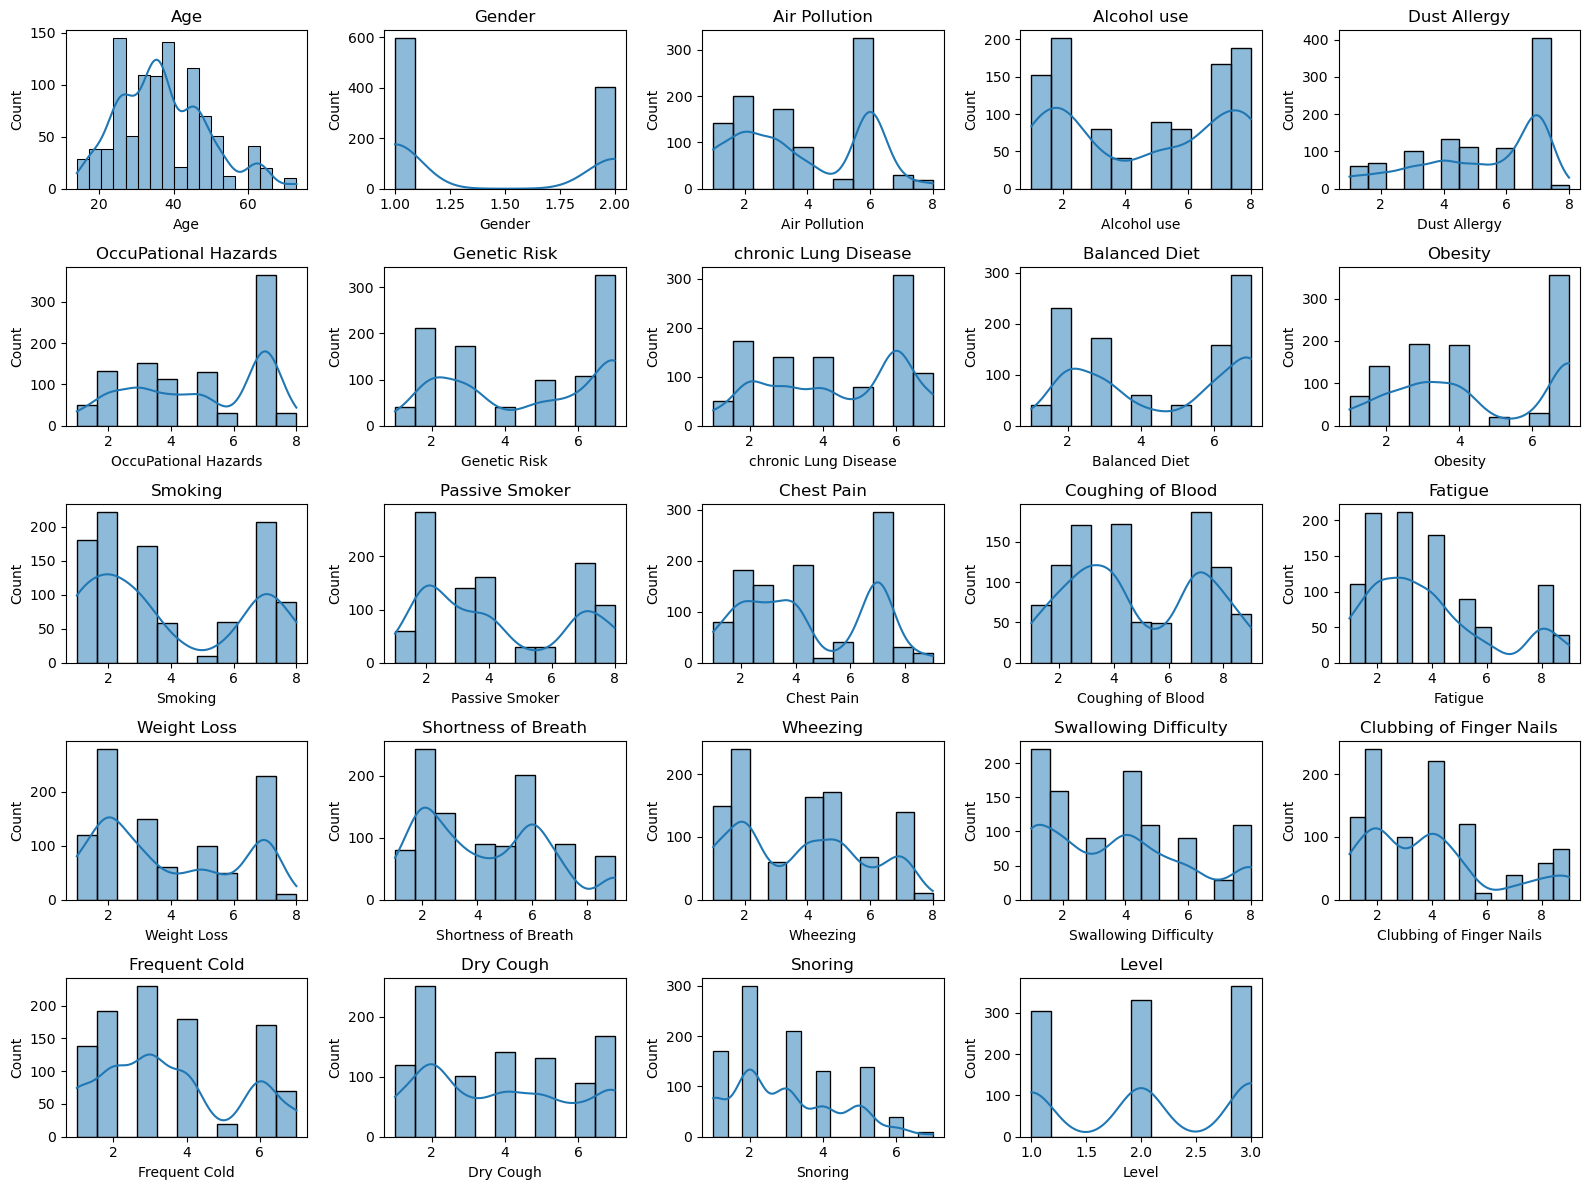

In [149]:
# Histograms
plt.figure(figsize=(16, 12))
for i, column in enumerate(data_stats.columns):
    plt.subplot(5, 5, i+1)
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()

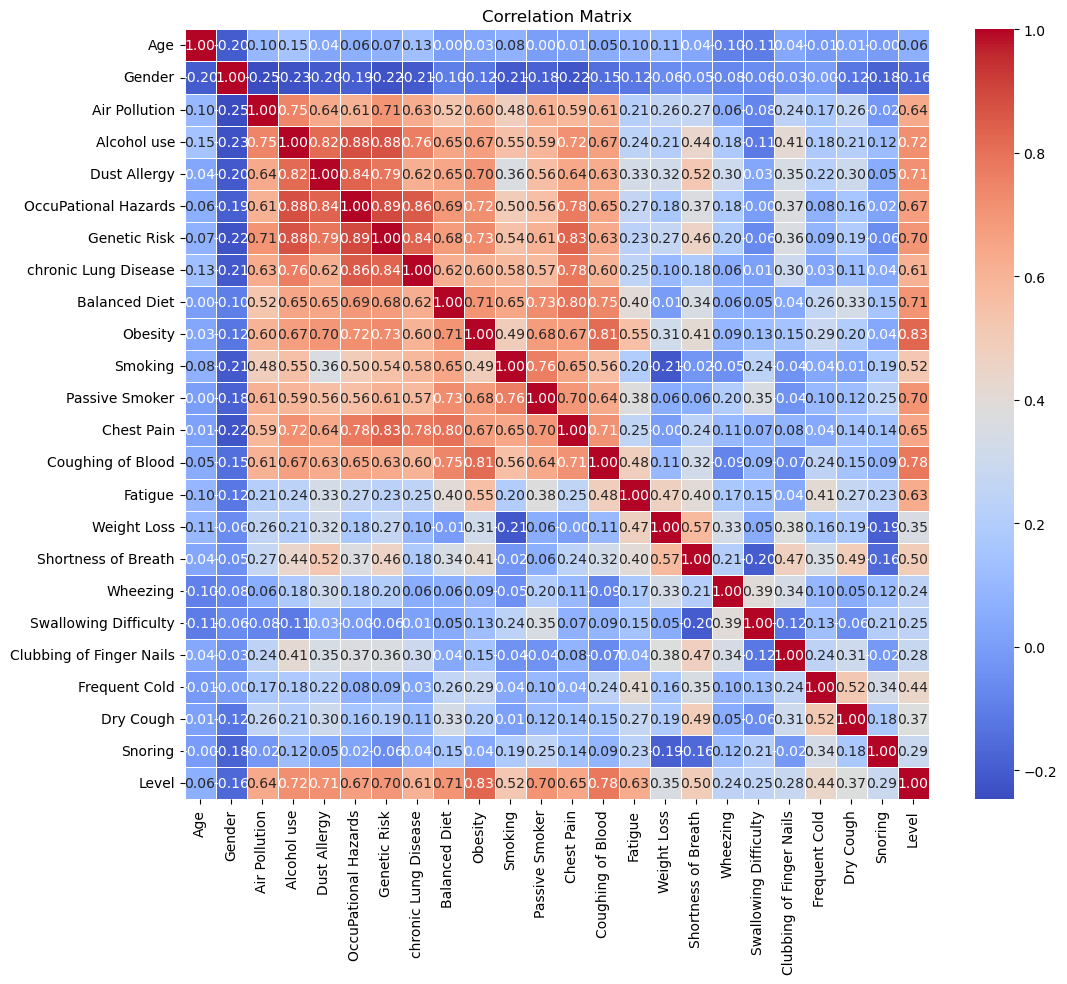

In [150]:
# Correlation Matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

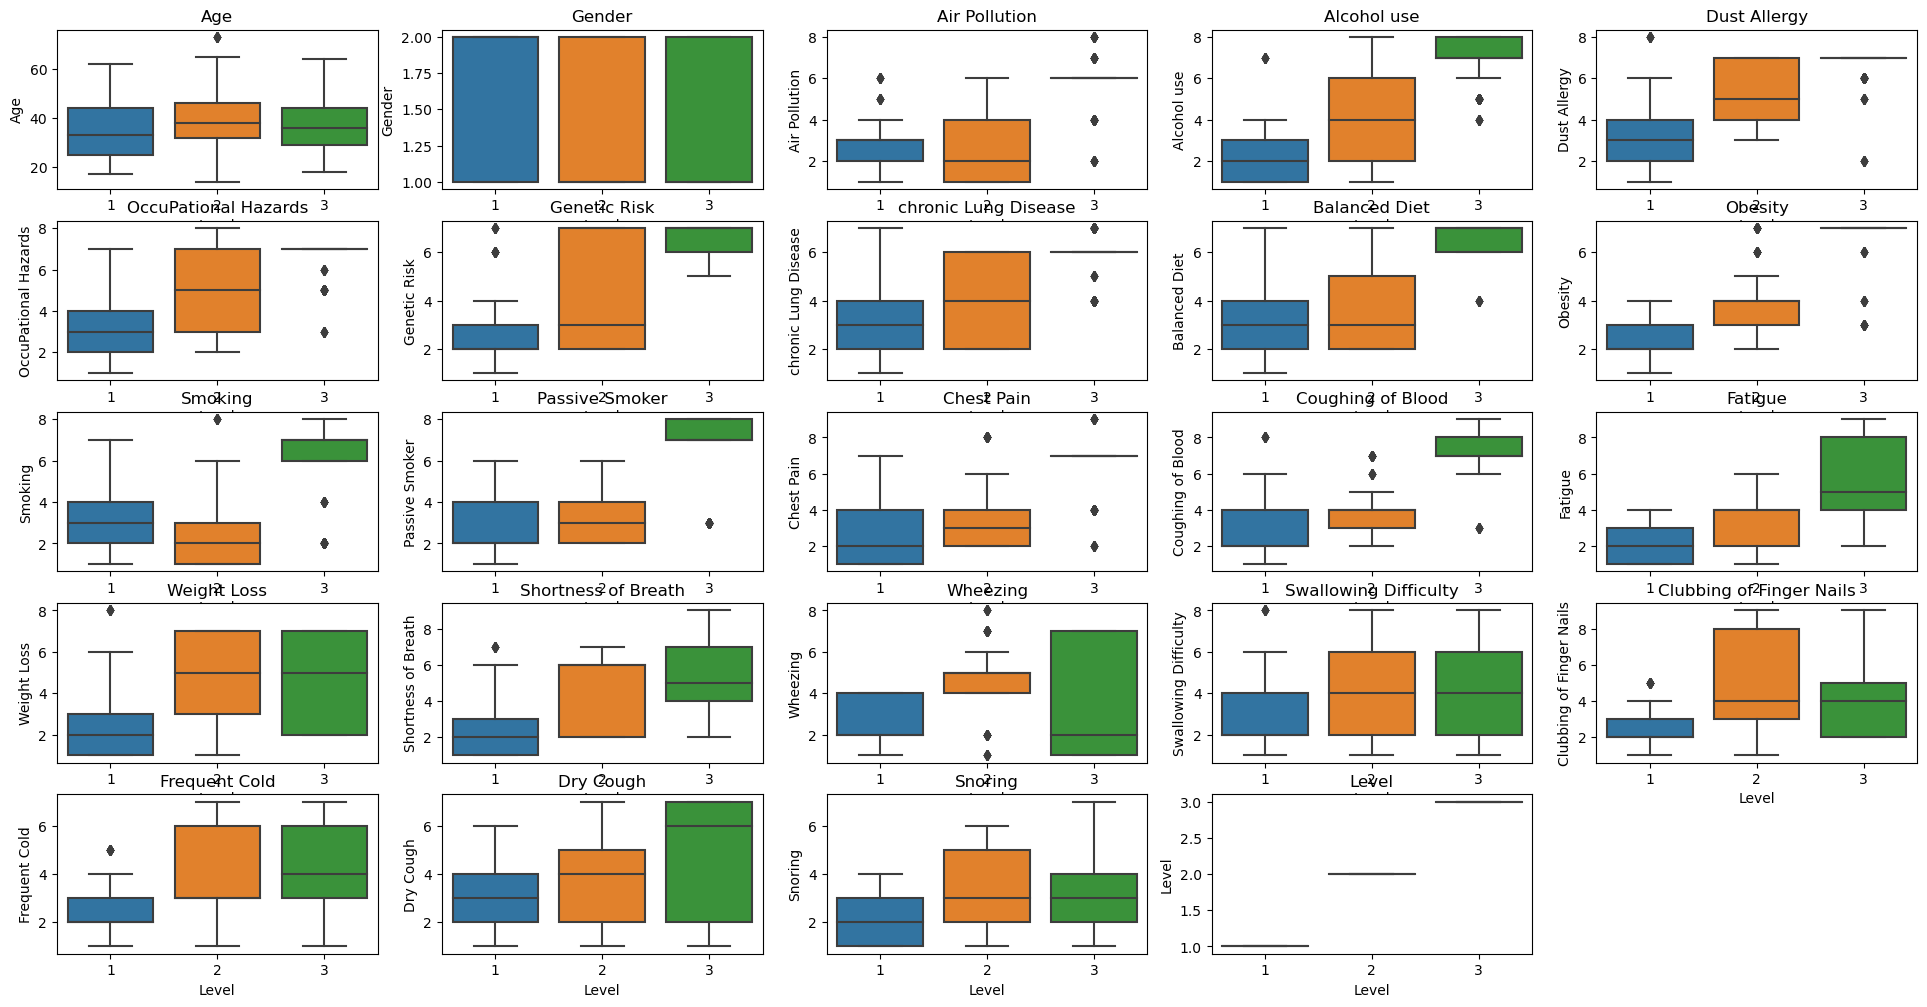

In [151]:
# Boxplot
plt.figure(figsize=(24, 12))
for i, column in enumerate(data_stats.columns):
    plt.subplot(5, 5, i+1)
    sns.boxplot(x='Level', y=column, data=data)
    plt.title(column)

In [152]:
# Dataset summary
data_stats = data.describe()

In [153]:
# Color Palette
level_palette = {1: 'red', 2: 'cyan', 3: 'blue'}

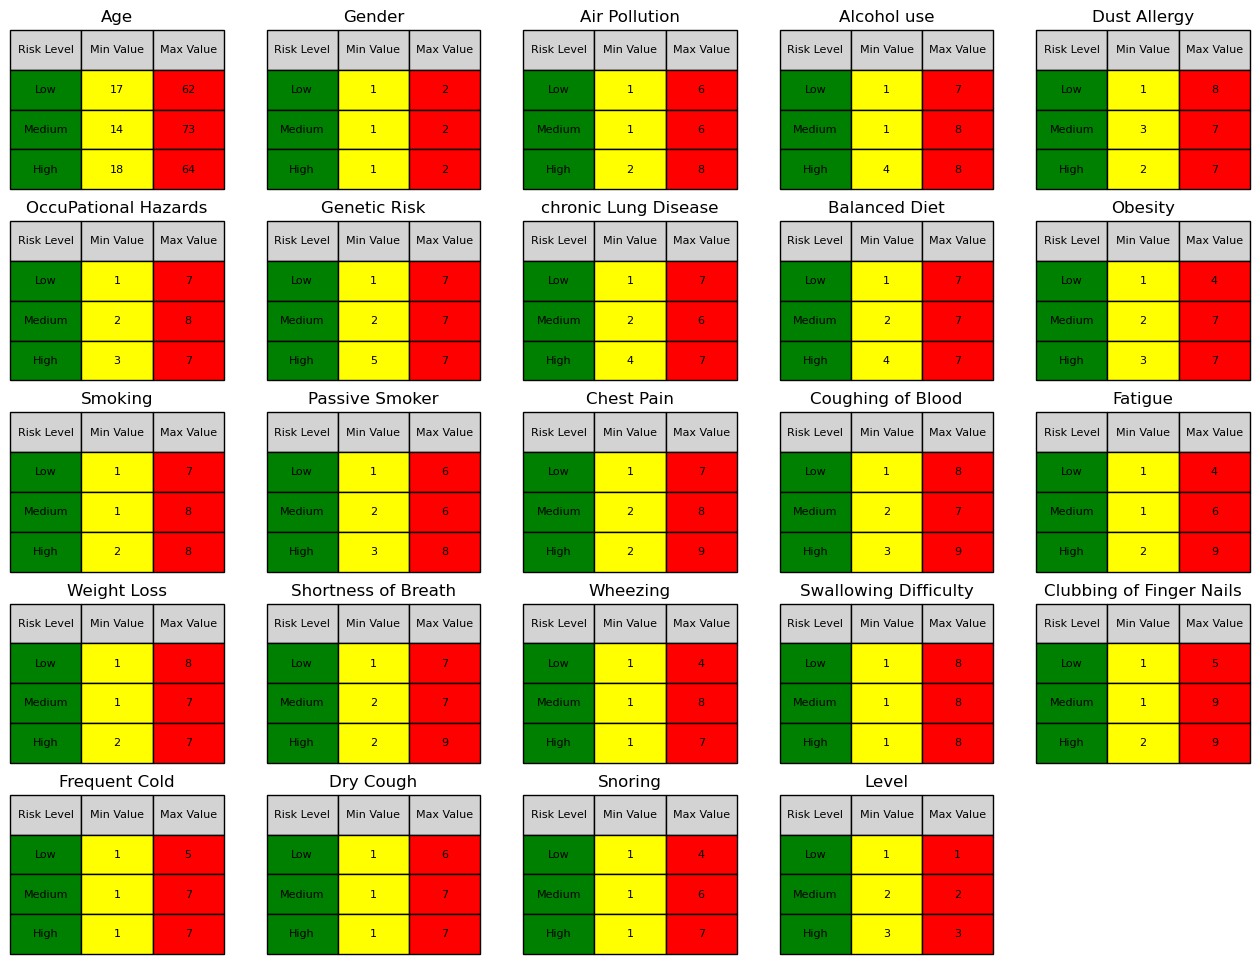

In [154]:
# Colored Grid Table
plt.figure(figsize=(16, 12))

for i, column in enumerate(data_stats.columns):
    plt.subplot(5, 5, i+1)

# Creating the table
    table_data = pd.DataFrame({
        'Risk Level': ['Low', 'Medium', 'High'],
        'Min Value': [data[column][data['Level'] == 1].min(), data[column][data['Level'] == 2].min(), data[column][data['Level'] == 3].min()],
        'Max Value': [data[column][data['Level'] == 1].max(), data[column][data['Level'] == 2].max(), data[column][data['Level'] == 3].max()]
    })

# Drawing the table
    plt.table(cellText=table_data.values,
              colLabels=table_data.columns,
              loc='center', cellLoc='center', colColours=['lightgrey']*3,
              cellColours=[['green', 'yellow', 'red']]*3, bbox=[0, 0, 1, 1])

# Hiding axes
    plt.axis('off')
    plt.title(column)

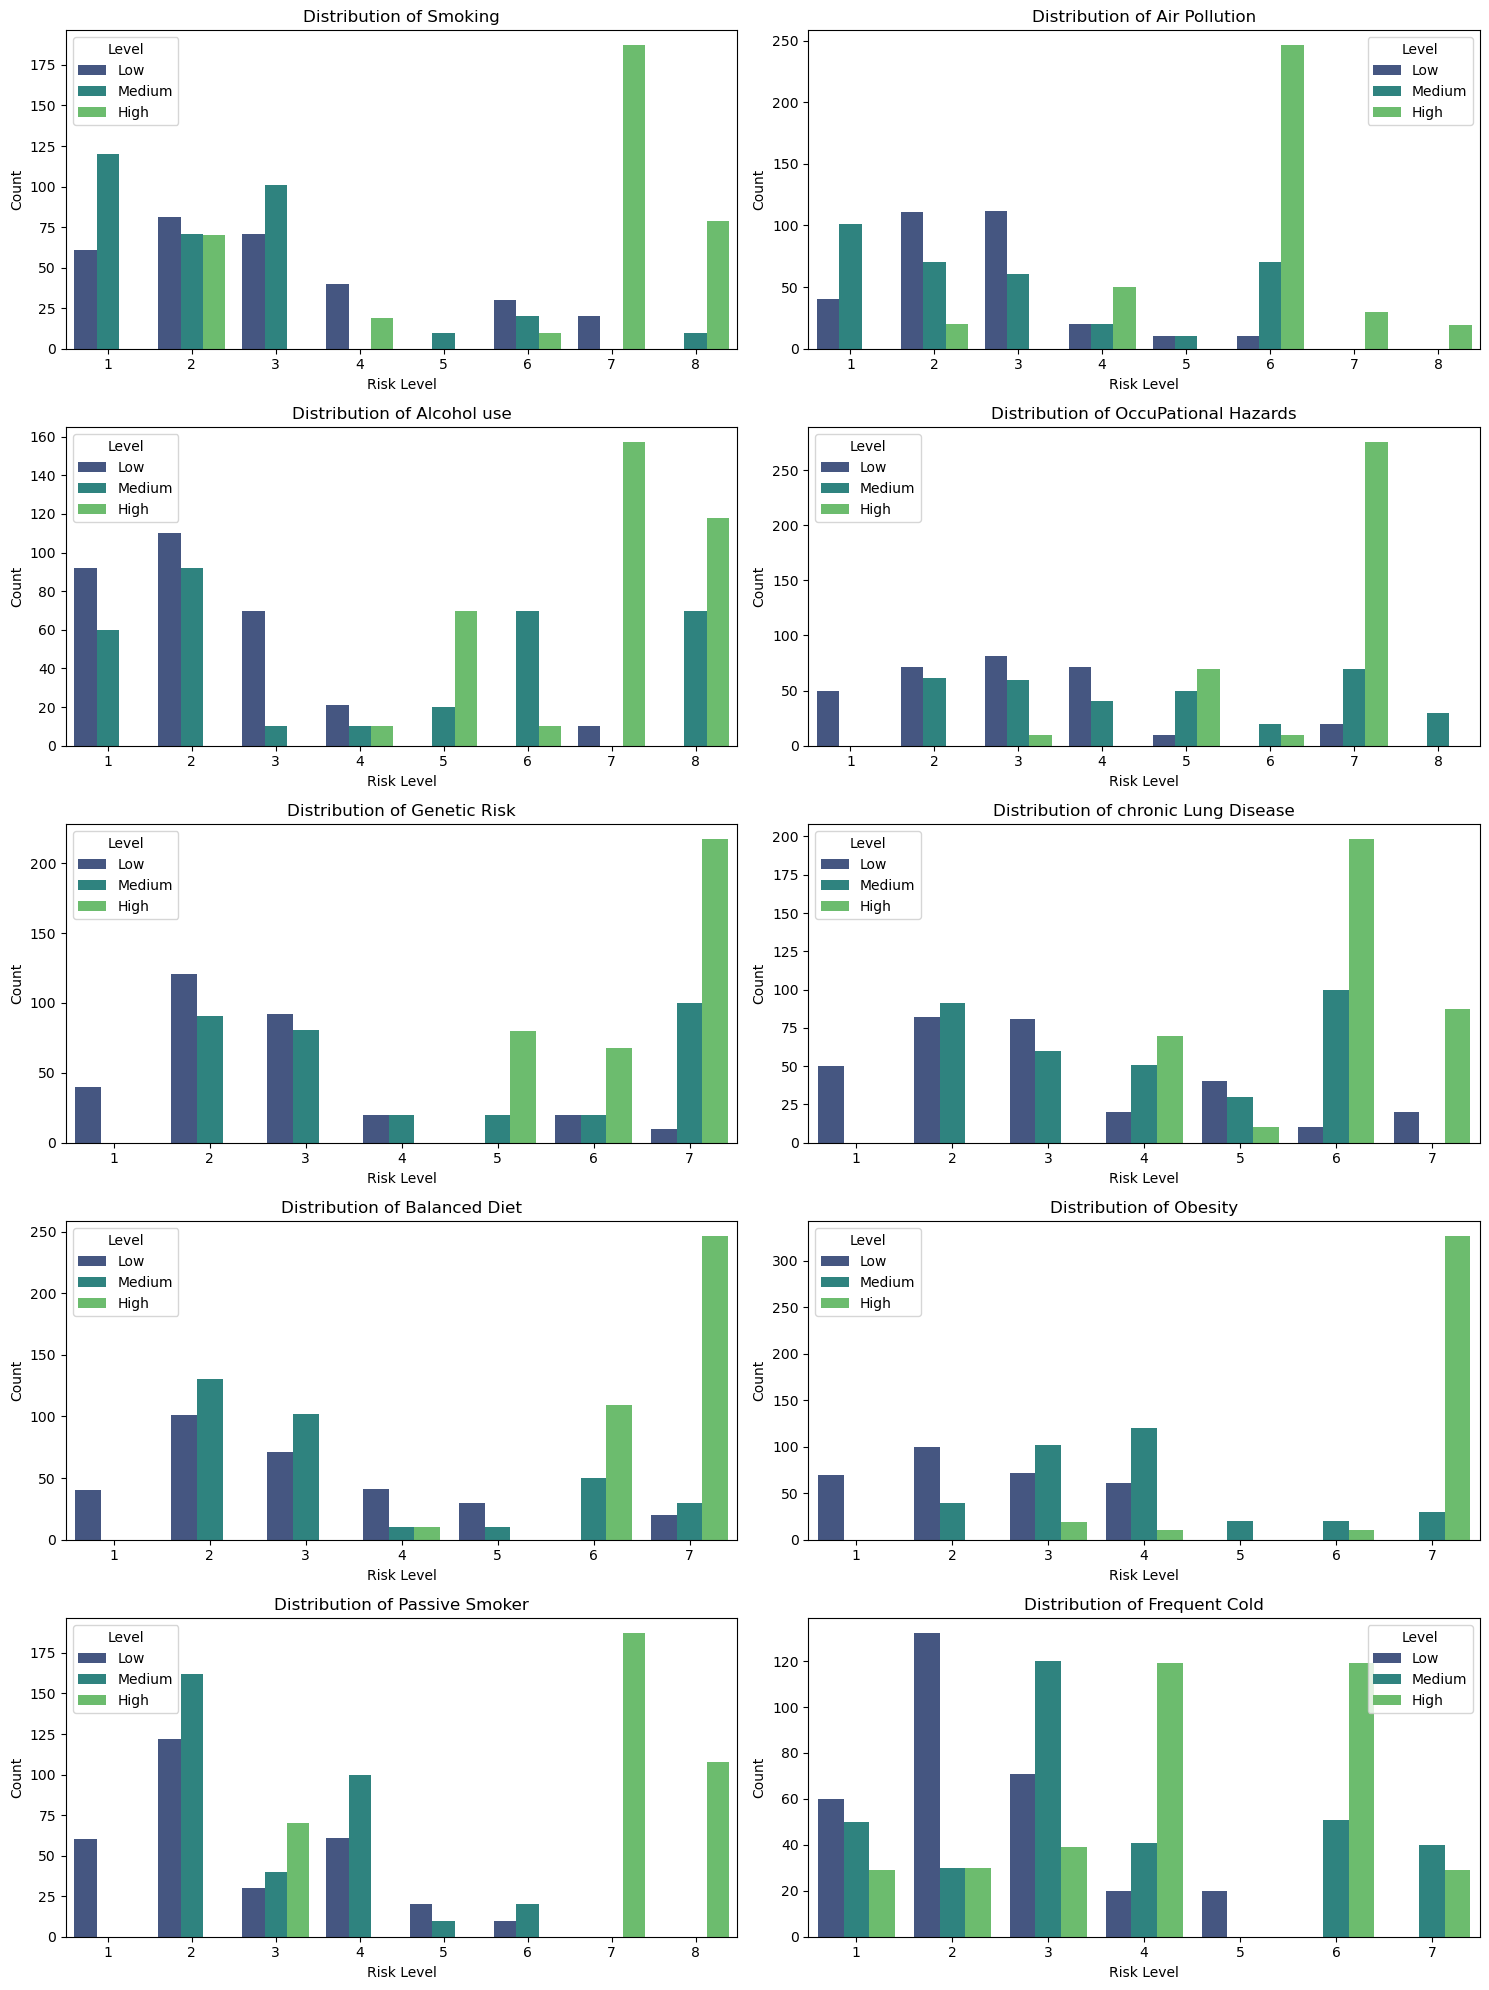

In [155]:
# Create a separate subplot for each risk factor
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))

# Risk factors in the dataset
risk_factors = ["Smoking", "Air Pollution", "Alcohol use", "OccuPational Hazards", 
                "Genetic Risk", "chronic Lung Disease", "Balanced Diet", "Obesity", 
                "Passive Smoker", "Frequent Cold"]

# Bar plots
for i, risk_factor in enumerate(risk_factors):
    row = i // 2
    col = i % 2
    
    sns.countplot(data=data, x=risk_factor, hue='Level', hue_order=[1, 2, 3], palette="viridis", ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {risk_factor}')
    axes[row, col].set_xlabel("Risk Level")
    axes[row, col].set_ylabel("Count")
    axes[row, col].legend(title='Level', labels=['Low', 'Medium', 'High'])

plt.tight_layout()
plt.show()


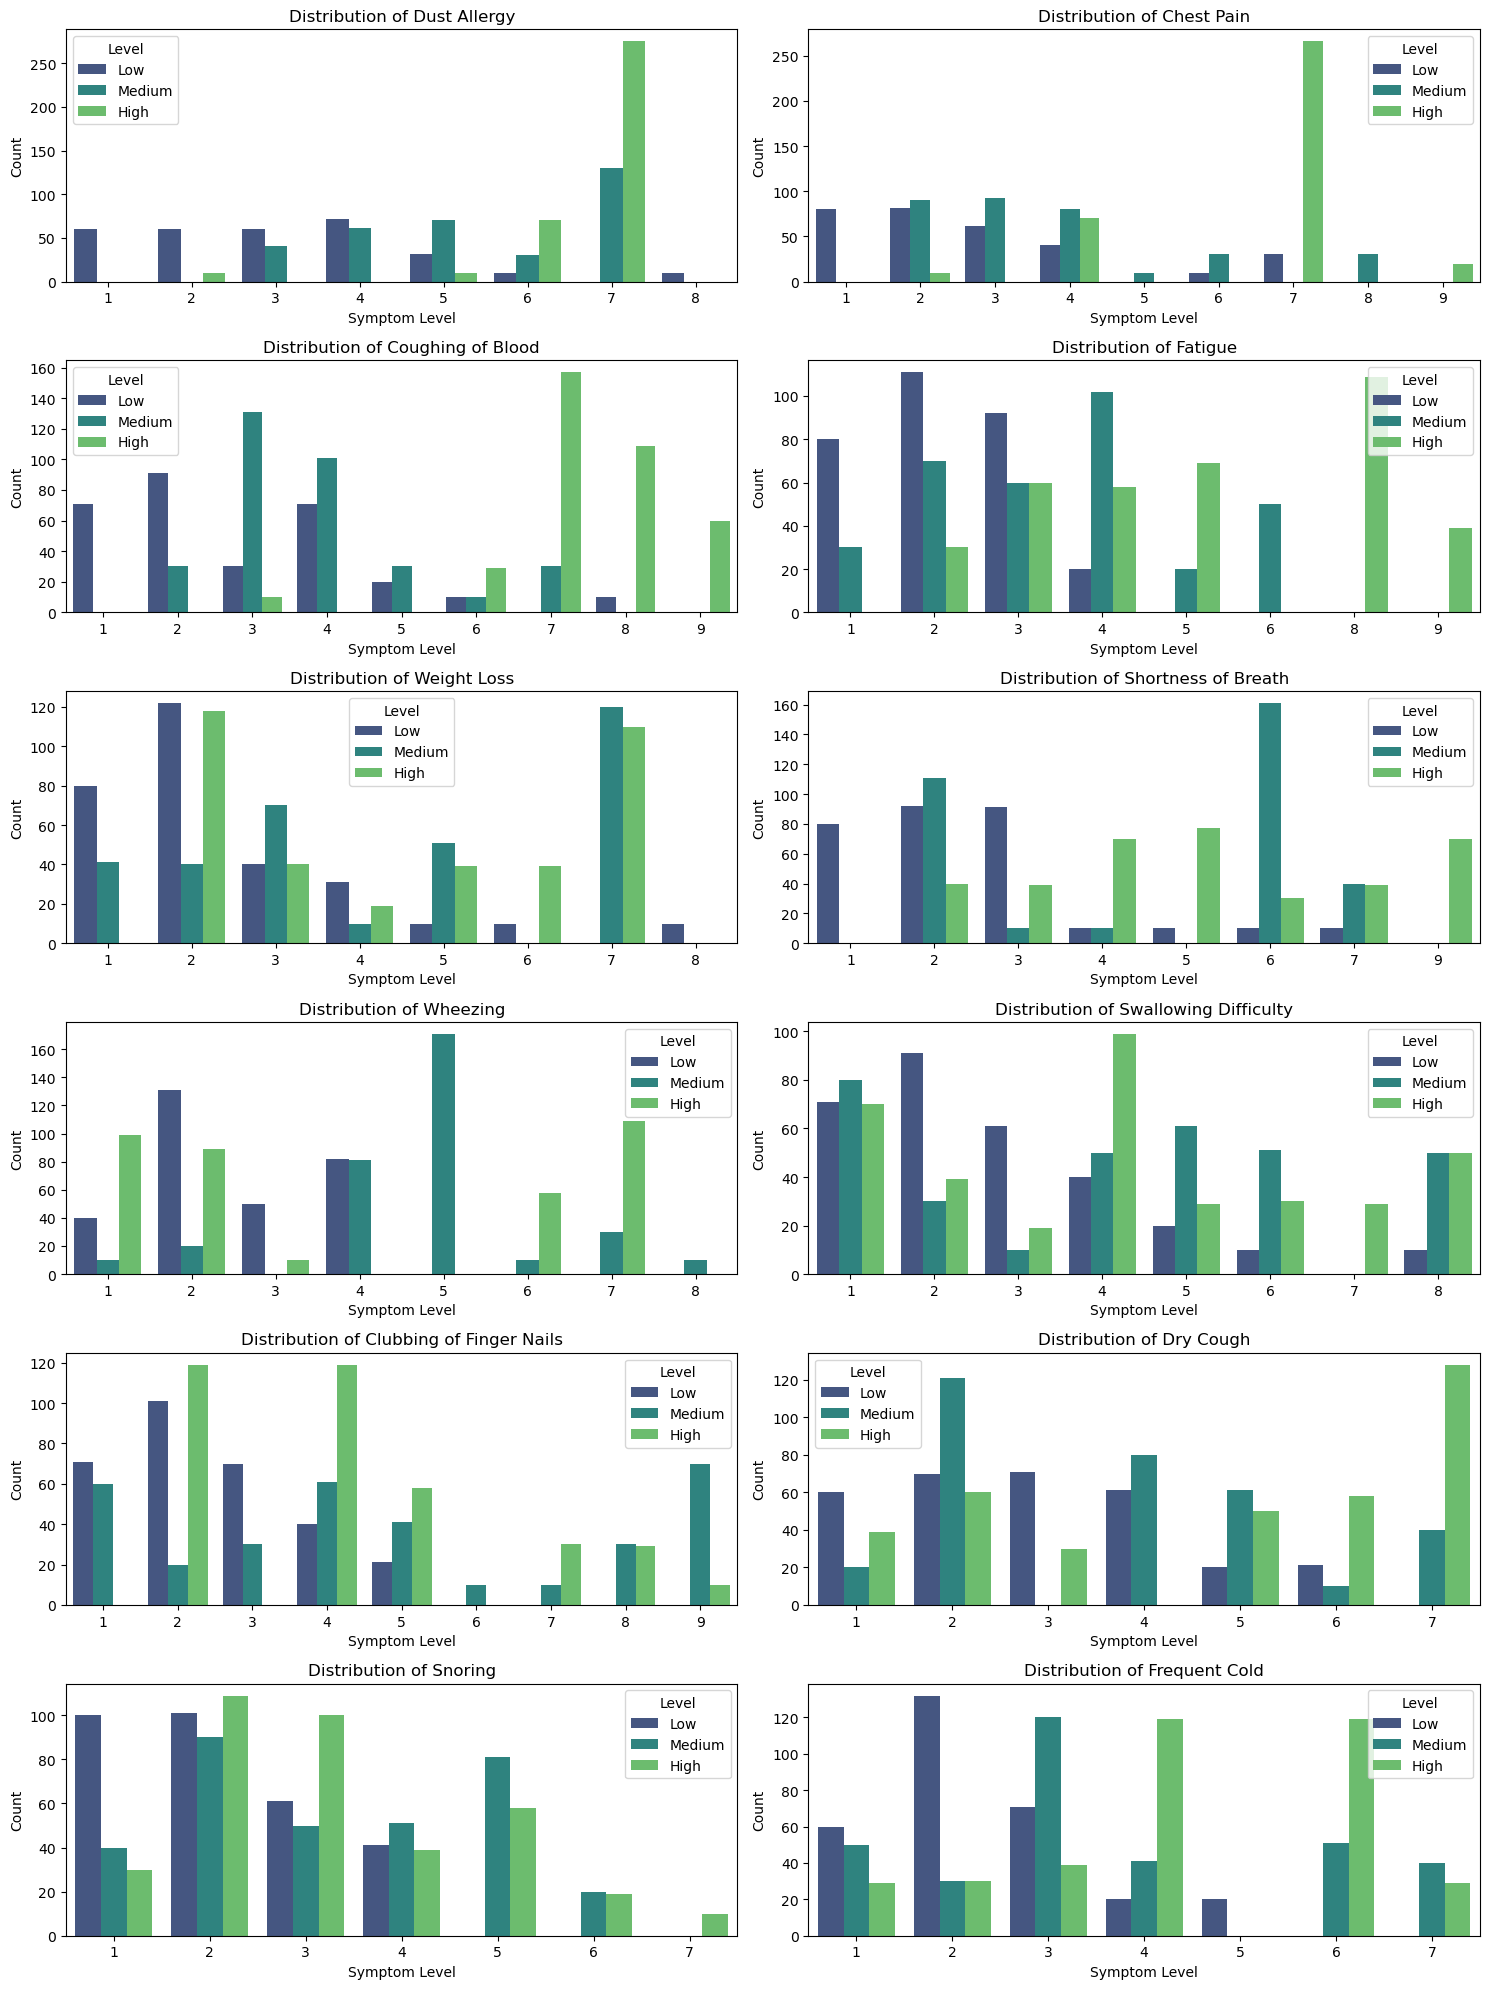

In [156]:
# Create a separate subplot for each symptom factor
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))

# Symptom factors in the dataset
symptom_factors = ["Dust Allergy", "Chest Pain", "Coughing of Blood", "Fatigue", "Weight Loss",
                    "Shortness of Breath", "Wheezing", "Swallowing Difficulty",
                    "Clubbing of Finger Nails", "Dry Cough",
                    "Snoring","Frequent Cold"]

# Bar plots
for i, symptom_factor in enumerate(symptom_factors):
    row = i // 2
    col = i % 2 
    
    sns.countplot(data=data, x=symptom_factor, hue='Level', hue_order=[1, 2, 3], palette="viridis", ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {symptom_factor}')
    axes[row, col].set_xlabel("Symptom Level")
    axes[row, col].set_ylabel("Count")
    axes[row, col].legend(title='Level', labels=['Low', 'Medium', 'High'])

plt.tight_layout()
plt.show()


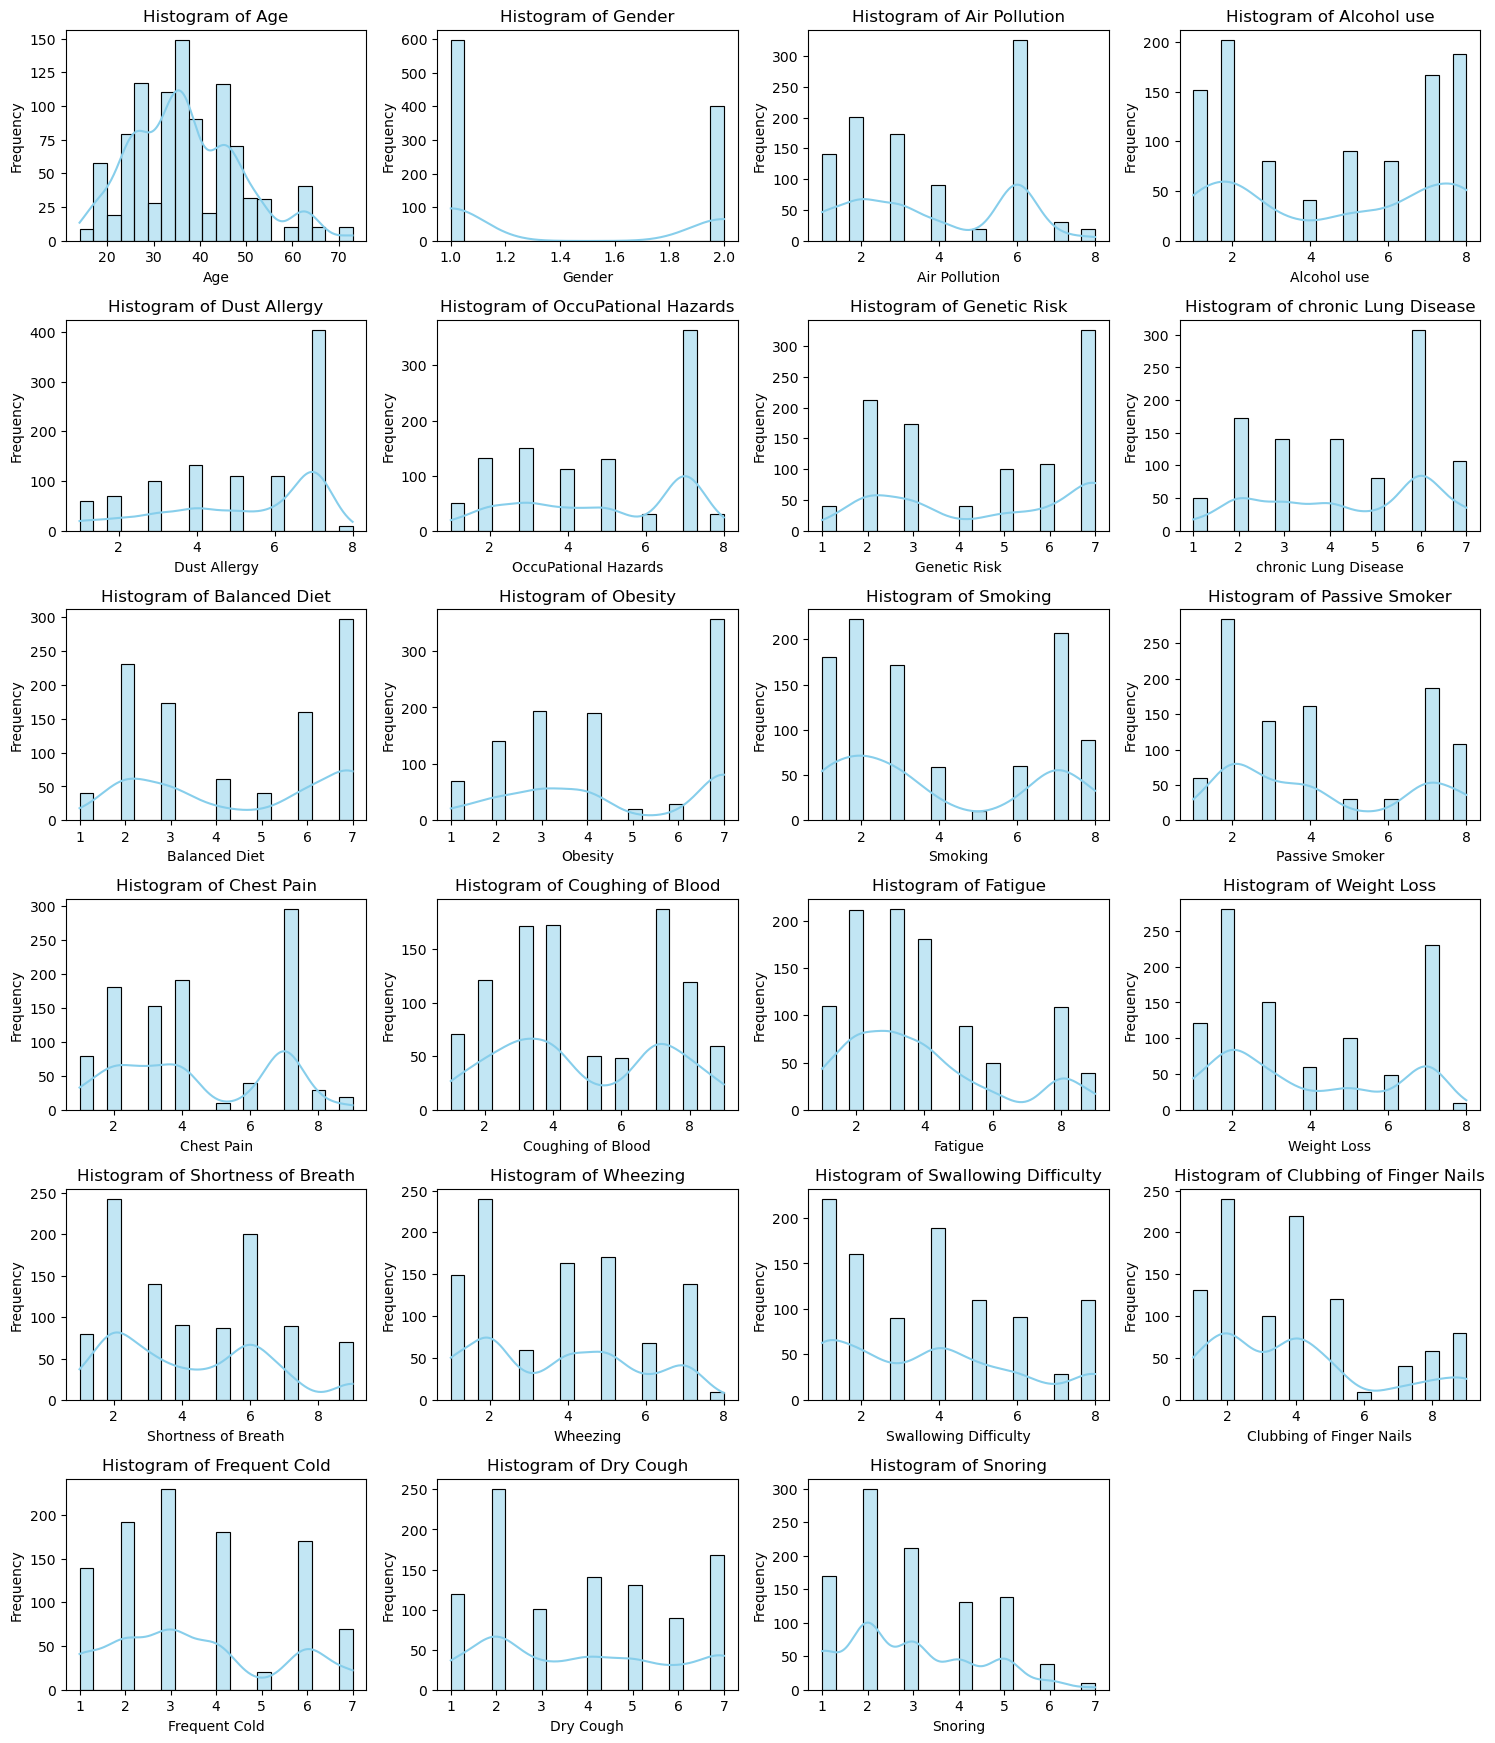

In [157]:
# Selected factors
histogram_factors = ["Age", "Gender", "Air Pollution", "Alcohol use", "Dust Allergy",
                    "OccuPational Hazards", "Genetic Risk", "chronic Lung Disease",
                    "Balanced Diet", "Obesity", "Smoking", "Passive Smoker",
                    "Chest Pain", "Coughing of Blood", "Fatigue", "Weight Loss",
                    "Shortness of Breath", "Wheezing", "Swallowing Difficulty",
                    "Clubbing of Finger Nails", "Frequent Cold", "Dry Cough",
                    "Snoring"]

# Create a separate subplot for each factor
fig, axes = plt.subplots(nrows=7, ncols=4, figsize=(15, 20))

# Create histograms
for i, factor in enumerate(histogram_factors):
    row = i // 4
    col = i % 4
    
    sns.histplot(data[factor], bins=20, kde=True, ax=axes[row, col], color="skyblue")
    axes[row, col].set_title(f'Histogram of {factor}')
    axes[row, col].set_xlabel(factor)
    axes[row, col].set_ylabel("Frequency")

# Remove empty subplots
for i in range(len(histogram_factors), 7*4):
    row = i // 4
    col = i % 4
    fig.delaxes(axes[row, col])
    
plt.tight_layout()
plt.show()


In [158]:
# Feature importances from the Random Forest model
feature_importances = rf_classifier.feature_importances_

In [159]:
# Create a DataFrame containing each feature and its importance level
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})


In [160]:
# Sort the feature importance levels in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

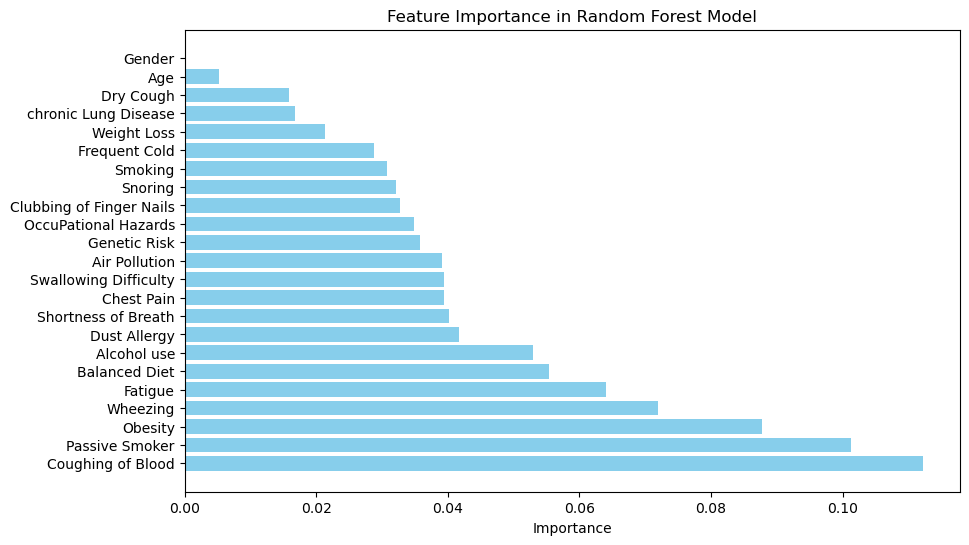

In [161]:
# Bar plot for feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest Model')
plt.show()

In [162]:
# Calculate the correlation between 'Smoking' and 'Passive Smoker' columns
data['Smoking'].corr(data['Passive Smoker'])

0.7616215035339873

<Axes: >

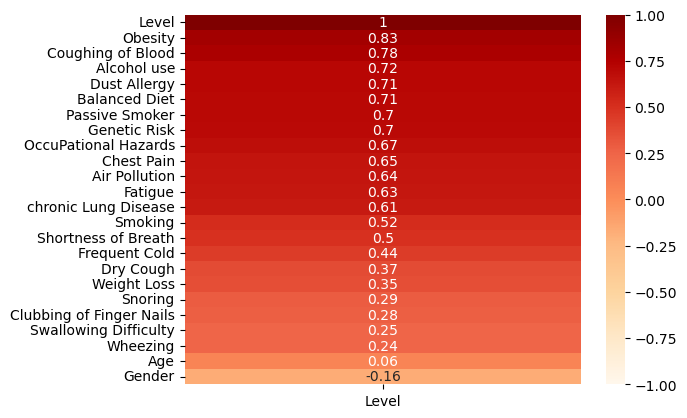

In [163]:
# Plot the heatmap
sns.heatmap(data.corr()[['Level']].sort_values(by='Level', ascending=False), vmin=-1, vmax=1, annot=True, cmap='OrRd')

In [164]:
# Separate the features (X) and target variable (y)
X=data.drop('Level',axis=1)

y=data['Level']

In [165]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

In [166]:
from sklearn.linear_model import LogisticRegression
# Create a Logistic Regression classifier
Classifier = LogisticRegression(solver='liblinear')
# Train the classifier on the training data
Classifier.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [167]:
# Make predictions on the test set
y_test_hat = Classifier.predict(X_test)

In [168]:
# Create a DataFrame to compare actual and predicted values
Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat})
Results.head(10)

,Actual,Predictions
507,3,3
818,1,1
452,1,1
368,3,3
242,3,3
929,3,3
262,1,1
810,3,3
318,1,1
49,2,2


In [169]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_hat))

0.99


In [170]:
y_train_hat = Classifier.predict(X_train)

print(accuracy_score(y_train,y_train_hat))

0.9814285714285714


In [171]:
y_test_hat_proba = Classifier.predict_proba(X_test)

print(y_test_hat_proba.shape)

(300, 3)


In [172]:
y_test_hat_proba[0:5,:]

array([[2.33473855e-03, 4.78277765e-02, 9.49837485e-01],
       [8.20856745e-01, 1.79143126e-01, 1.29019619e-07],
       [9.72182193e-01, 1.75883289e-03, 2.60589740e-02],
       [2.75746128e-05, 1.13415703e-01, 8.86556723e-01],
       [7.34588088e-05, 1.48082283e-02, 9.85118313e-01]])

In [173]:
# Given array in scientific notation
array_in_scientific = y_test_hat_proba[0:5,:]

# Convert to normal number format
array_in_normal = np.vectorize(lambda x: format(x, '.16f'))(array_in_scientific)

print(array_in_normal)

[['0.0023347385537058' '0.0478277764901010' '0.9498374849561932']
 ['0.8208567445695004' '0.1791431264108803' '0.0000001290196194']
 ['0.9721821930862838' '0.0017588328895964' '0.0260589740241198']
 ['0.0000275746127580' '0.1134157026863643' '0.8865567227008777']
 ['0.0000734588088344' '0.0148082282864419' '0.9851183129047236']]


In [174]:
# Compare the predicted values with the actuals along with the predicted probability that the class is "M".

pls = y_test_hat_proba[:,1]

Results = pd.DataFrame({'Actual':y_test,'Predictions':y_test_hat,'Prob(Class = 3)':pls})

Results.head(5)

,Actual,Predictions,Prob(Class = 3)
507,3,3,0.047828
818,1,1,0.179143
452,1,1,0.001759
368,3,3,0.113416
242,3,3,0.014808


In [175]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_hat)

print(cm)

[[105   0   0]
 [  2  82   0]
 [  1   0 110]]


Text(95.72222222222221, 0.5, 'True Label')

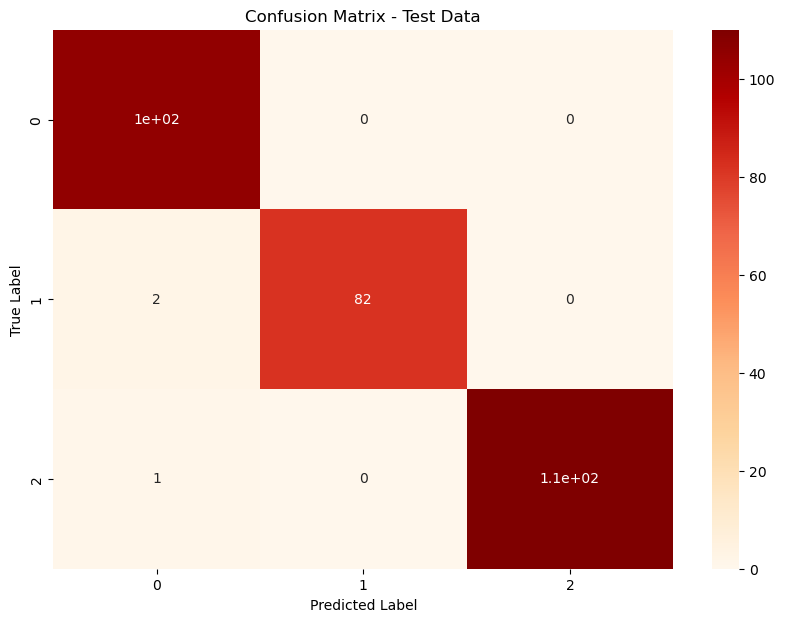

In [176]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True,cmap='OrRd')
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

In [177]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [178]:
def perform(y_pred):
    print("Precision : ", precision_score(y_test, y_test_hat, average = 'micro'))
    print("Recall : ", recall_score(y_test, y_test_hat, average = 'micro'))
    print("Accuracy : ", accuracy_score(y_test, y_test_hat))
    print("F1 Score : ", f1_score(y_test, y_test_hat, average = 'micro'))
    cm = confusion_matrix(y_test, y_pred)
    print("\n", cm)
    print("\n")
    print("**"*27 + "\n" + " "* 16 + "Classification Report\n" + "**"*27)
    print(classification_report(y_test, y_test_hat))
    print("**"*27+"\n")
    
    cm = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=['Low', 'Medium', 'High'])
    cm.plot()

Precision :  0.99
Recall :  0.99
Accuracy :  0.99
F1 Score :  0.99

 [[105   0   0]
 [  2  82   0]
 [  1   0 110]]


******************************************************
                Classification Report
******************************************************
              precision    recall  f1-score   support

           1       0.97      1.00      0.99       105
           2       1.00      0.98      0.99        84
           3       1.00      0.99      1.00       111

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300

******************************************************



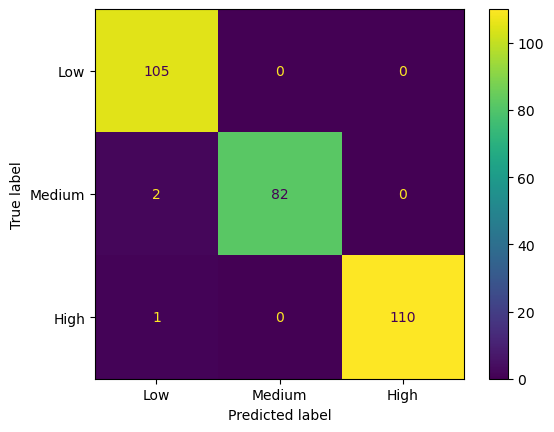

In [179]:
perform(y_test_hat)

In [180]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat))

              precision    recall  f1-score   support

           1       0.97      1.00      0.99       105
           2       1.00      0.98      0.99        84
           3       1.00      0.99      1.00       111

    accuracy                           0.99       300
   macro avg       0.99      0.99      0.99       300
weighted avg       0.99      0.99      0.99       300



In [181]:
# Create a decision tree model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)  # Assuming you have a training set (X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [182]:
# Visualize the first decision tree
tree_rules = export_text(tree_model, feature_names=list(X.columns))
print(tree_rules)


|--- Obesity <= 6.50
|   |--- Wheezing <= 4.50
|   |   |--- Snoring <= 4.50
|   |   |   |--- Obesity <= 4.50
|   |   |   |   |--- class: 1
|   |   |   |--- Obesity >  4.50
|   |   |   |   |--- Coughing of Blood <= 4.00
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- Coughing of Blood >  4.00
|   |   |   |   |   |--- class: 2
|   |   |--- Snoring >  4.50
|   |   |   |--- Genetic Risk <= 5.50
|   |   |   |   |--- class: 2
|   |   |   |--- Genetic Risk >  5.50
|   |   |   |   |--- class: 3
|   |--- Wheezing >  4.50
|   |   |--- Coughing of Blood <= 5.00
|   |   |   |--- class: 2
|   |   |--- Coughing of Blood >  5.00
|   |   |   |--- class: 3
|--- Obesity >  6.50
|   |--- Frequent Cold <= 1.50
|   |   |--- class: 2
|   |--- Frequent Cold >  1.50
|   |   |--- class: 3



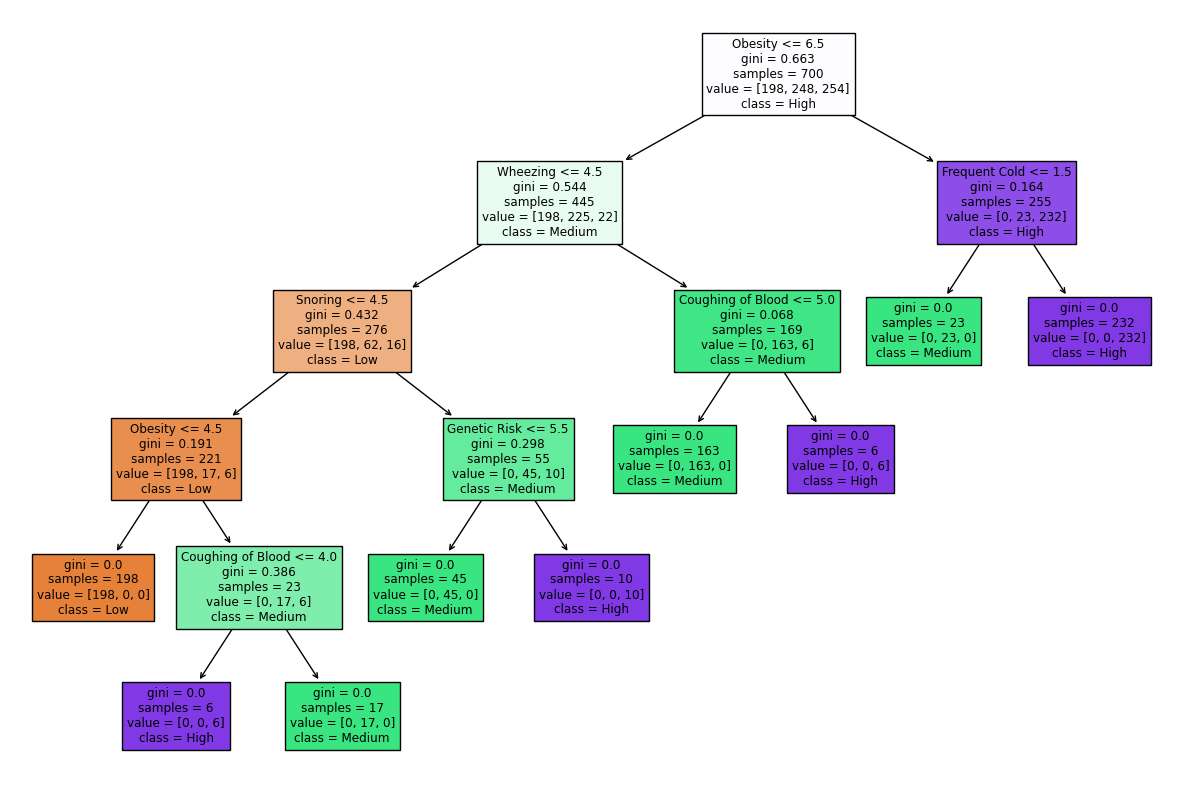

In [183]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_model, filled=True, feature_names=list(X.columns), class_names=['Low', 'Medium', 'High'])
plt.show()

In [184]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Data preparation
X = data.drop('Level', axis=1)
y = data['Level']

In [185]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [186]:
# Specifying hyperparameter ranges for Random Forest
param_dist = {
    'n_estimators': [50, 100, 150, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [187]:
# Random Forest modelling
rf_model = RandomForestClassifier(random_state=42)

In [188]:
# Finding the best hyperparameters using RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 150, 200]},
                   random_state=42)

In [189]:
# Training the model with the best hyperparameters
best_rf_model = rf_random.best_estimator_
best_rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=30, min_samples_split=10, random_state=42)

In [190]:
# Evaluating the model
y_pred = best_rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [191]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import randint

# Data preparation
X = data.drop('Level', axis=1)
y = data['Level']

In [192]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [193]:
# Specifying hyperparameter ranges for ANN
param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
}


In [194]:
# Creating an ANN model
ann_model = MLPClassifier(random_state=42, max_iter=500)

In [195]:
# Finding the best hyperparameters using RandomizedSearchCV
ann_random = RandomizedSearchCV(estimator=ann_model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
ann_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=MLPClassifier(max_iter=500, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'activation': ['logistic', 'tanh',
                                                       'relu'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [(50,), (100,),
                                                               (50, 50),
                                                               (100, 50)],
                                        'learning_rate': ['constant',
                                                          'invscaling',
                                                          'adaptive'],
                                        'solver': ['lbfgs', 'sgd', 'adam']},
                   random_state=42)

In [196]:
# Training the model with the best hyperparameters
best_ann_model = ann_random.best_estimator_
best_ann_model.fit(X_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(100, 50), max_iter=500,
              random_state=42)

In [197]:
# Evaluating the model
y_pred = best_ann_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import uniform

# Data preparation
X = data.drop('Level', axis=1)
y = data['Level']

In [199]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
# Specifying hyperparameter ranges for Logistic Regression
param_dist = {
    'C': uniform(loc=0, scale=4),
    'penalty': ['l1', 'l2']
}

In [201]:
# Creating a Logistic Regression model
logreg_model = LogisticRegression(random_state=42, max_iter=1000)

In [202]:
# Finding the best hyperparameters using RandomizedSearchCV
logreg_random = RandomizedSearchCV(estimator=logreg_model, param_distributions=param_dist, n_iter=100, cv=3, random_state=42, n_jobs=-1)
logreg_random.fit(X_train, y_train)

C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
129 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
129 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver 

RandomizedSearchCV(cv=3,
                   estimator=LogisticRegression(max_iter=1000, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000022233522450>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42)

In [203]:
# Training the model with the best hyperparameters
best_logreg_model = logreg_random.best_estimator_
best_logreg_model.fit(X_train, y_train)

C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=0.7337391594646552, max_iter=1000, random_state=42)

In [204]:
# Evaluating the model
y_pred = best_logreg_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00        62
           3       1.00      1.00      1.00        71

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [205]:
# Data preparation
X = data.drop('Level', axis=1)
y = data['Level']

In [206]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [207]:
# Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
rf_accuracy = rf_cv_scores.mean()

In [208]:
# Artificial Neural Network Model
ann_model = MLPClassifier(random_state=42)
ann_cv_scores = cross_val_score(ann_model, X_train, y_train, cv=5, scoring='accuracy')
ann_accuracy = ann_cv_scores.mean()

C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\neural_network\_multi

In [209]:
# Logistic Regression Model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
lr_accuracy = lr_cv_scores.mean()

C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\yekta\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

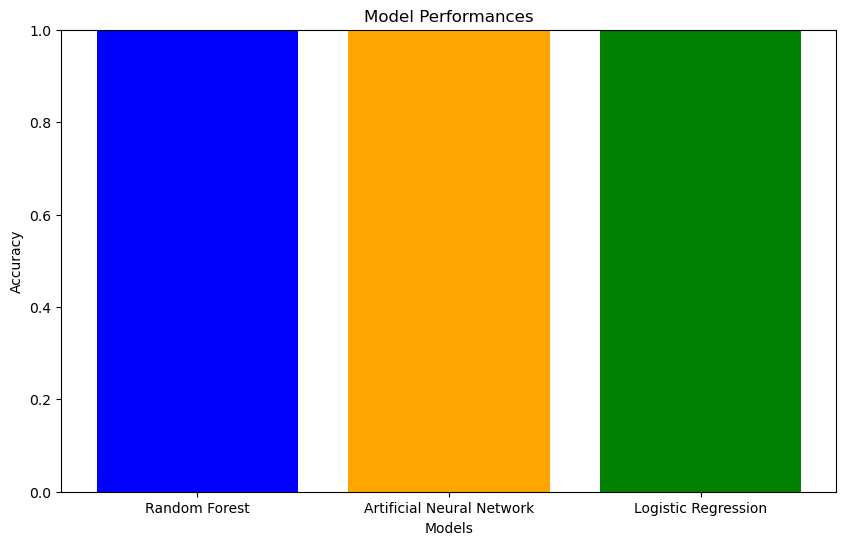

Random Forest Accuracy: 1.0
ANN Accuracy: 0.99875
Logistic Regression Accuracy: 1.0


In [210]:
# Performance results
performances = [rf_accuracy, ann_accuracy, lr_accuracy]
models = ['Random Forest', 'Artificial Neural Network', 'Logistic Regression']

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, performances, color=['blue', 'orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performances')
plt.ylim(0, 1)  # The height can range from 0 to 1
plt.show()
# Print the results
print("Random Forest Accuracy:", rf_accuracy)
print("ANN Accuracy:", ann_accuracy)
print("Logistic Regression Accuracy:", lr_accuracy)
